In [23]:
# imports 
import time
import os, sys, glob
import cv2
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch

from tqdm.auto import tqdm
from PIL import Image, ImageFile
from importlib import reload
from torch.utils.data import DataLoader
from IPython.display import clear_output
from scipy.ndimage import distance_transform_edt, binary_dilation

# custom imports
sys.path.append('../')

from utils.GetLowestGPU import GetLowestGPU
from utils.GetLR import get_lr
import utils.BuildWNet as BuildWNet
import utils.WNetTileGenerator as TG
import utils.Loss as Loss
import utils.Train as Train

# get device
device = torch.device(GetLowestGPU(verbose=2))

---------------------------
 GPU | Memory-usage    
---------------------------
  0  | 34186MiB / 40537MiB
  1  | 04930MiB / 40537MiB
  2  | 00428MiB / 40537MiB
  3  | 00428MiB / 40537MiB
  4  | 00428MiB / 40537MiB
  5  | 00428MiB / 40537MiB
  6  | 00428MiB / 40537MiB
  7  | 00428MiB / 40537MiB
---------------------------
 Device set to cuda:2
---------------------------


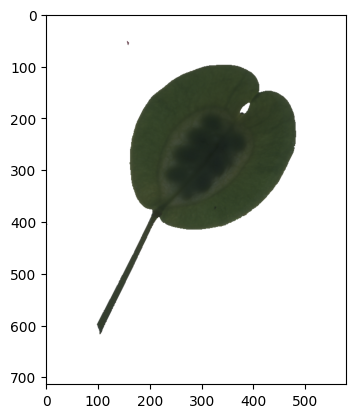

In [24]:
test_image = Image.open('../data/train/images_by_pod/8.tt8t x fc6-8.G.WBP-2022.W_0.png')
test_image = np.array(test_image) / 225.0
mask = test_image.sum(-1) > 1
mask = ~mask

test_image[~mask] = 1
plt.imshow(test_image)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/thresh.cpp:1555: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 22 (CV_64FC3)
